# K-Nearest Neighbors (aka GLaDOS)
**von Edin Sivic und Julian Baumann**

Im folgendem wird ein Machine Learning Klassifizierungsproblem mithilfe des `K-Nearest Neighbors` gelöst. <br />
Als distanzbestimmungsformel wird die `euclidean distance` genutzt.

Als Datenset wird das Iris Datenset genutzt. Wichtig hierbei, ist die analogie der Pflanze:

![test](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)


Dataset basiert auf https://gist.github.com/nafiul-nipu/c46c3297aec7843016359a98467b17d3

Die Iris csv is ein ganz bekanntes data set für das machine learning. Diese Datensätze bestehen aus 3 verschiedenen Arten von Iris (Schwertlilien) Setosa, Versicolor und Virginica die 3 Arten unterschieden sich in ihren Blütenblättern (petal) und Kelchblättern (sepal).

In [111]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
# CSV Datei einlesen und auf ein 2D Array mappen
iris_dataset_file = pd.read_csv("iris_dataset.csv", sep=",", header=None)

# Ersten 5 Reihen ausgeben um Werte anzusehen
print(iris_dataset_file.head(5))

iris_dataset = iris_dataset_file.values

# Erste Zeile aus dem Datenset in eine separate Variable abspeichern
feature_names = iris_dataset[0]

# Alle weiteren Reihen in die Variable iris_dataset abspeichern
iris_dataset = iris_dataset[1:]

              0            1             2            3        4
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   setosa
2           4.9          3.0           1.4          0.2   setosa
3           4.7          3.2           1.3          0.2   setosa
4           4.6          3.1           1.5          0.2   setosa


Wir nutzen hier "StandardScaler().fit_transform" um die Daten zu normalisieren.

Mit hilfe dieser Fromel wereden die Werte normalisiert:
$
\begin{align}
x_{norm}=\frac{x-{x_{min}}}{x_{max}-x_{min}}
\end{align}
$

In Machine Learning Context steht groß X für die tatsächlichen Daten und y für die Zuordnung (Labels).

In [113]:
X = StandardScaler().fit_transform(iris_dataset[:, 0:4])
y = iris_dataset[:, 4]

In [114]:
# Datenset in trainings- und testdaten trennen. Test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Folgend werden Funktionen definiert um einen Graph mit den gewünschten Daten zu zeichnen

In [135]:
import matplotlib.pyplot as plt

COLORS = {
    "setosa": "red",
    "virginica": "green",
    "versicolor": "blue"
}

def show_graph(feature_one: int, feature_two: int, X_dataset: numpy.ndarray, y_labels: numpy.ndarray, show_color = True):
    fig, ax = plt.subplots()

    for index, data in enumerate(X_dataset):
        classification = y_labels[index]
        if show_color:
            ax.scatter(data[feature_one], data[feature_two], color=COLORS[classification])
        else:
            ax.scatter(data[feature_one], data[feature_two], color="#000000")

    # set a title and labels
    ax.set_xlabel(feature_names[feature_one])
    ax.set_ylabel(feature_names[feature_two])

    plt.show()

## Trainingsdaten Validierung

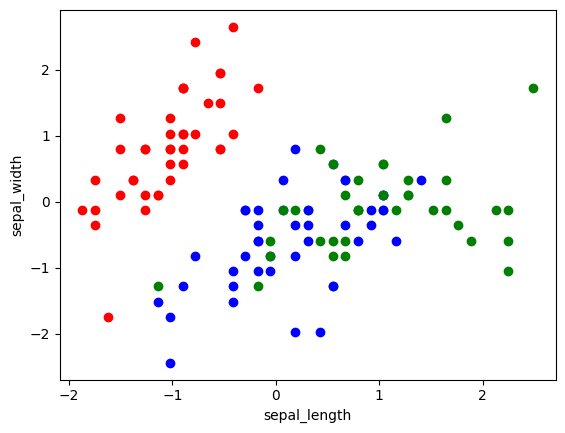

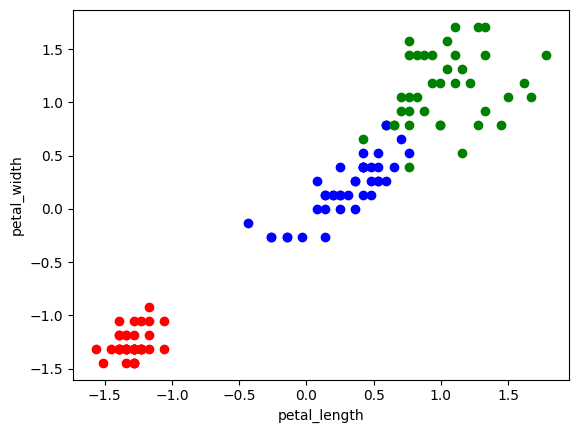

In [136]:
show_graph(0, 1, X_train, y_train)
show_graph(2, 3, X_train, y_train)

Beim ausgeben der Daten ist also ein klarer Zusammenhang zwischen den Features (sepal/petal width & length) ersichtlich.

**Klare Klassifizierung der Daten möglich!**

## Testdaten Visualisierung

Folgend werden die noch unkategorisierten Test-Daten dargestellt.

Zu diesen Daten ist uns nur jeweils ein Punkt $P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$ und keine zugehörigen Labels wie Setosa, Versicolor und Virginica bekannt


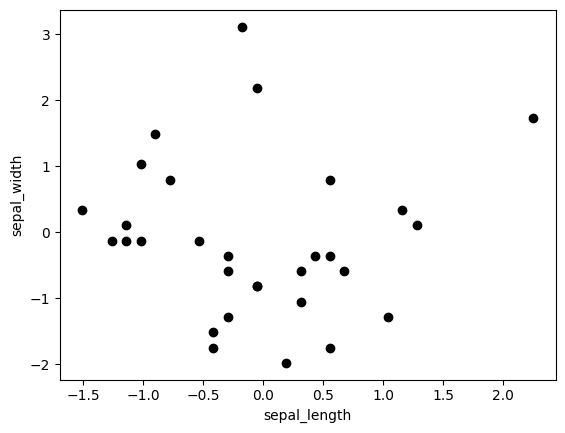

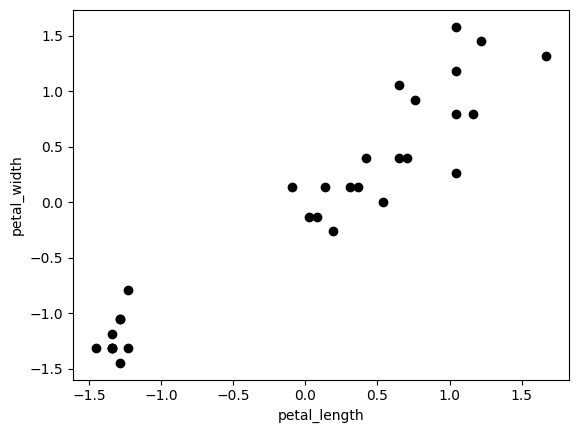

In [137]:
show_graph(0, 1, X_test, y_test, False)
show_graph(2, 3, X_test, y_test, False)

## Vorhersage und Algorithms Implementation

Um nun einen neuen Datenpunk einer bestimmten Klasse zuzuordnen, betrachten wir die anliegenden Nachbarn.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.l-retina.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image" width="700" />

Es wird jeweils die Distanz zu jedem einzelnen bekannten Datenpunkt mithilfe der `eucledius distance` Formel berechnet, die wie folgt lautet:
$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

In diesem Datenset gilt n = 4 gilt, weil wir 4 Features in unseren Daten haben (sepal width, sepal length, petal width, petal length). <br />
Also $p = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$ und $q = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$

In [118]:
import math

def euclidean_distance(p: numpy.ndarray, q: numpy.ndarray) -> float:
    distance = 0

    for dimension in range(q.size - 1):
        distance += (q[dimension] - p[dimension])**2

    return math.sqrt(distance)

## Aufbau des Klassifizierers

Die Klasse `KNearestNeighborsClassifier` enthält Methoden um die Genauigkeit von verschiedenen K-Werten zu bestimmen und um die tatsächliche Vorhersage zu treffen.


In [119]:
class KNearestNeighborsClassifier():
    def __init__(self, k: int, X_train: numpy.ndarray, y_train: numpy.ndarray):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_sample: numpy.ndarray) -> str:
        distances = []
        for index, training_row in enumerate(self.X_train):
            calculated_distance = euclidean_distance(X_sample, training_row)
            distances.append((self.y_train[index], calculated_distance))

        distances.sort(key=lambda element: element[1])
        neighbors = []

        for index in range(self.k):
            neighbors.append(distances[index][0])

        prediction = max(set(neighbors), key=neighbors.count)

        return prediction

    def evaluate(self, X_test: numpy.ndarray, y_test: numpy.ndarray) -> float:
        accurate_count = 0

        for index, X_sample in enumerate(X_test):
            prediction = self.predict(X_sample)

            if prediction is y_test[index]:
                accurate_count += 1

        accuracy = (accurate_count / float(len(X_test)))

        return accuracy

## Besten K-Wert bestimmen

Hier probieren wir K-Werte von 1-100 aus und analysieren, wie diese sich auf die Genauigkeit der Vorhersage auswirkt. Je näher die Genauigkeit eines K-Wert an 100% kommt, desto besser.

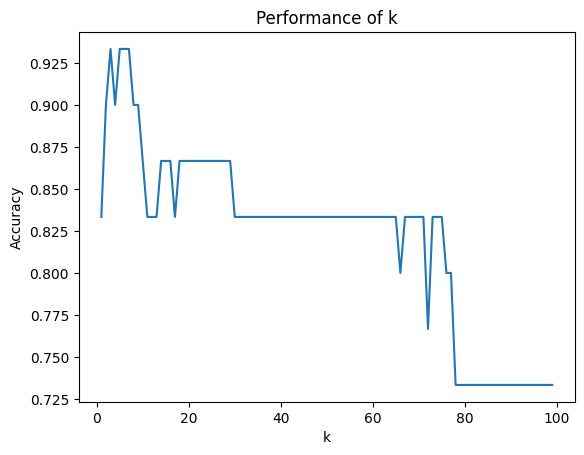

Best accuracy: 93.33%
Best k: 3


In [140]:
# Funktion definiert zur Ermittlung des besten k-Wertes
def find_best_k(k_values: range):
    accuracies = []
    for k in k_values:
        knn = KNearestNeighborsClassifier(k, X_train, y_train)
        accuracy = knn.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    return accuracies

# Besten K Wert ermitteln
k_values = range(1, 100)
accuracies = find_best_k(k_values)
best_k = accuracies.index(max(accuracies)) + 1

# Graph zeichnen
fig, ax = plt.subplots()
ax.plot(k_values, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of k")
plt.show()


print(f"Best accuracy: {max(accuracies):.2%}")
print(f"Best k: {best_k}")

## Unbekannte Daten kategorisieren

Wir nehmen einen zufälligen Punkt aus unseren Test-Datenset und lassen die Klassifizierung durch den `KNN` bestimmen.

In [134]:
import random

random_index = random.randint(0, len(X_test) - 1)

X_sample = X_test[random_index]

knn = KNearestNeighborsClassifier(best_k, X_train, y_train)
prediction = knn.predict(X_sample)

print(f"Unclassified data: {X_sample}")
print(f"Prediction: {prediction}")
print(f"Actual: {y_test[random_index]}")

Unclassified data: [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
Prediction: setosa
Actual: setosa
